# The bitcoin price and prices of oil, silved and gold
We will use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

In [1]:
using CSV
using DataFrames

Read cleaned bitcoin, oil, silved and gold data

In [2]:
dataPrices = DataFrame(CSV.File("C:/Users/felip/OneDrive/Documentos/MathML/Taller 1/prices2021.csv"))
dataPrices = dataPrices[:,2:6]

,Date,PriceBitcoin,PriceGold,PriceOil,PriceSilver
,Date,Float64,Float64,Float64,Float64
1,2021-01-01,29374.2,1887.6,67.98,26.52
2,2021-01-02,32127.3,1906.13,53.55,26.77
3,2021-01-03,32782.0,1924.67,60.64,27.01
4,2021-01-04,31971.9,1943.2,61.45,27.58
5,2021-01-05,33992.4,1940.35,64.59,27.87
6,2021-01-06,36824.4,1931.95,67.72,27.27
7,2021-01-07,39371.0,1920.1,75.23,27.47
8,2021-01-08,40797.6,1862.9,71.91,24.84
9,2021-01-09,40254.6,1857.68,68.59,24.99


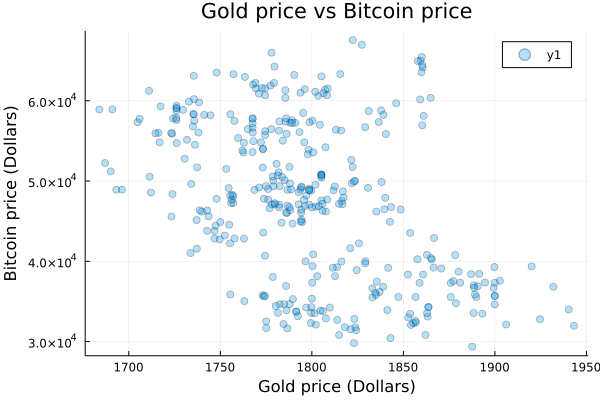

In [3]:
using Plots
scatter(dataPrices.PriceGold, dataPrices.PriceBitcoin,
    marker=:auto, 
    alpha = 0.3,
    title = "Gold price vs Bitcoin price",
    xlabel = "Gold price (Dollars)",
    ylabel = "Bitcoin price (Dollars)")

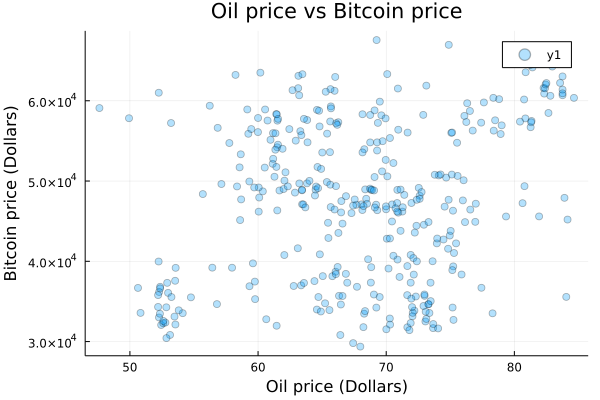

In [4]:
scatter(dataPrices.PriceOil, dataPrices.PriceBitcoin,
    marker=:auto, 
    alpha = 0.3,
    title = "Oil price vs Bitcoin price",
    xlabel = "Oil price (Dollars)",
    ylabel = "Bitcoin price (Dollars)")

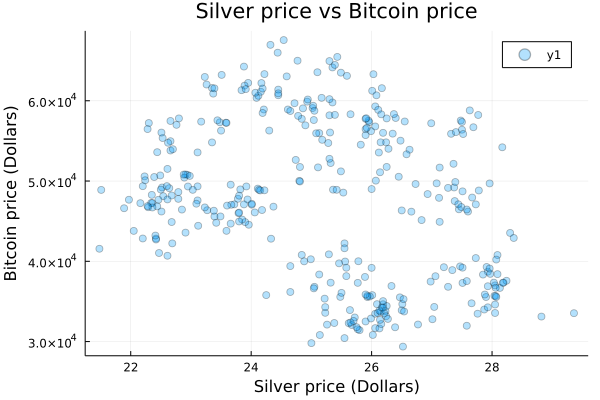

In [5]:
scatter(dataPrices.PriceSilver, dataPrices.PriceBitcoin,
    marker=:auto, 
    alpha = 0.3,
    title = "Silver price vs Bitcoin price",
    xlabel = "Silver price (Dollars)",
    ylabel = "Bitcoin price (Dollars)")

Least squares formulation:

$\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$

In [6]:
N = size(dataPrices.PriceBitcoin,1);
A = Array(dataPrices[:,3:5]);
b = Array(dataPrices.PriceBitcoin);
A = [ones(N,1) A]

365×4 Matrix{Float64}:
 1.0  1887.6   67.98  26.52
 1.0  1906.13  53.55  26.77
 1.0  1924.67  60.64  27.01
 1.0  1943.2   61.45  27.58
 1.0  1940.35  64.59  27.87
 1.0  1931.95  67.72  27.27
 1.0  1920.1   75.23  27.47
 1.0  1862.9   71.91  24.84
 1.0  1857.68  68.59  24.99
 1.0  1852.47  75.88  25.13
 1.0  1847.25  84.05  25.48
 1.0  1841.25  65.57  25.64
 1.0  1858.85  52.91  25.77
 ⋮                    
 1.0  1796.3   68.23  22.28
 1.0  1793.75  71.12  22.5
 1.0  1792.8   72.76  22.79
 1.0  1805.2   73.79  22.94
 1.0  1805.2   74.24  22.91
 1.0  1805.2   74.68  22.89
 1.0  1805.2   75.12  22.88
 1.0  1805.2   75.57  22.98
 1.0  1805.2   75.98  23.11
 1.0  1794.25  76.56  22.85
 1.0  1805.85  76.99  23.09
 1.0  1805.85  75.21  23.38

Least squares solution:

$\tilde{x} = \mbox{arg min}_{x} J(\mathbf x) = \mbox{arg min}_{x} \| Ax - b \|_2^2$

$J(x) = \| Ax - b\|_2^2 = ( Ax - b )^T ( Ax - b ) = (A x)^T (A x) - (A x)^T b - b^T (A x) + b^T b$

$J(x) = x^T A^T Ax - 2 x^T A^T b + b^T b$

Now **minimizing** $J(x)$ w.r.t $x$:

$\frac{\partial J(x)}{\partial  x} = - 2 A^T b + 2 A^T A x = 0$

We obtain the [normal equations](https://en.wikipedia.org/wiki/Linear_least_squares#Derivation_of_the_normal_equations):

$A^T A x = A^T b$

The solution:

$x = (A^T A)^{-1} A^T  b = A^+ b$

With $A^+ = (A^T A)^{-1} A^T$ the Moore-Penrose pseudoinverse of $A$.

* Using the unique least squares approximate solution of overdetermined equations:

$(A^T A)^{-1} A^T$y

In [7]:
v1 = inv(transpose(A)*A)*transpose(A)*b

4-element Vector{Float64}:
 185495.9044952169
    -80.84000476738584
    249.64757895527782
   -381.3908718787425

* Using the Moore-Penrose pseudoinverse:

In [8]:
using LinearAlgebra
v2 = pinv(A)*b

4-element Vector{Float64}:
 185495.90449523117
    -80.84000476740192
    249.64757895534984
   -381.39087187788914

* Using the QR solution:

In [9]:
xhat1 = A\b

4-element Vector{Float64}:
 185495.9044952315
    -80.84000476740235
    249.64757895534953
   -381.39087187787874

In [10]:
pred = A*xhat1

365-element Vector{Float64}:
 39758.86799146613
 34563.14042083101
 34742.834257986106
 33229.69071162958
 34133.374770291906
 35822.662255595
 38579.19145566787
 43377.46775927034
 42913.413991242734
 45101.12654460248
 47429.24528439628
 43239.775514405366
 38606.87226758024
     ⋮
 48819.069618231006
 49662.78714175572
 50038.40382292695
 49235.916139353474
 49359.6992760397
 49477.17202821761
 49590.830871676764
 49665.033195018856
 49717.80788904644
 50846.96316373188
 49925.0337581301
 49370.057714744995

We plot the model

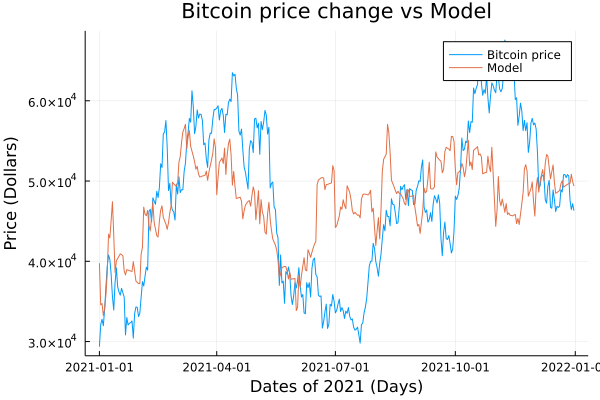

In [11]:
using Plots
plot(dataPrices.Date,b,
     title = "Bitcoin price change vs Model",
     label = "Bitcoin price",
     ylabel = "Price (Dollars)",
     xlabel = "Dates of 2021 (Days)")
plot!(dataPrices.Date,pred, label = "Model")

As we can see, the model seems to be good at the first six months of 2021, but since july the model begins to behave almost contrary to the data.

Now, we will analize the correlation between gold, silver and Oil prices with the Bitcoin price.

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption.

In [12]:
Bit = Array(dataPrices.PriceBitcoin);
Gold = Array(dataPrices.PriceGold);
Oil = Array(dataPrices.PriceOil);
Silver = Array(dataPrices.PriceSilver);

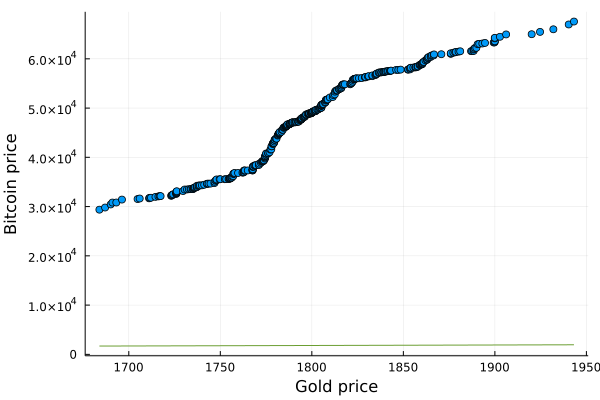

In [13]:
using StatsPlots
plot(qqplot(Gold, Bit, 
        xlabel = "Gold price", 
        ylabel ="Bitcoin price"))

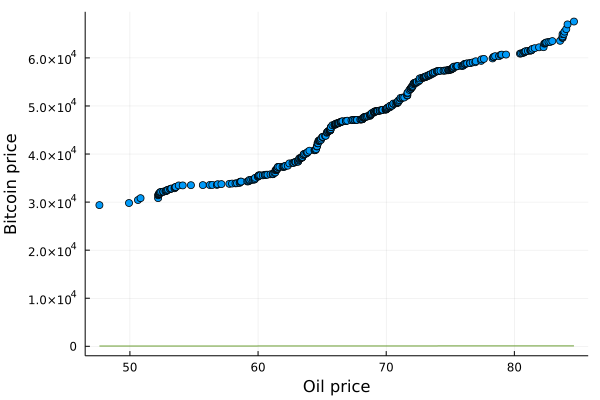

In [14]:
plot(qqplot(Oil, Bit, 
        xlabel = "Oil price", 
        ylabel ="Bitcoin price"))

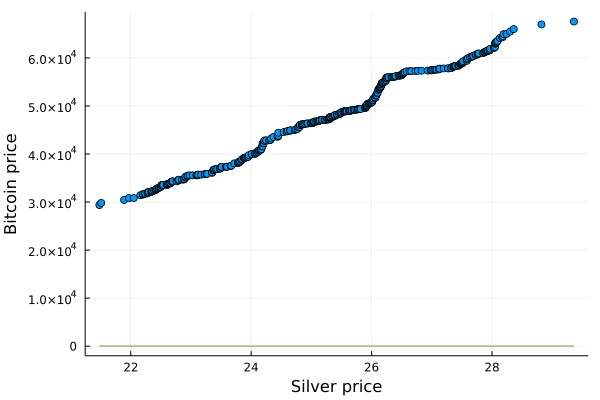

In [15]:
plot(qqplot(Silver, Bit, 
        xlabel = "Silver price", 
        ylabel ="Bitcoin price"))

According to the first two graphs above (Gold/Bitcoin and Oil/Bitcoin), the lack of normality of the data can be evidenced, and it cannot be assumed that there is a distribution, so non-parametric methods are applied as Spearman's correlation coefficient.

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

In [16]:
using StatsBase

corspearman(Bit, Gold)

-0.42459430892195166

In [17]:
corspearman(Bit, Oil)

0.15593767517431864

On the other hand, as we can see in the third graph (Silver/Bitcoin), there seems to be normality in the data for wich in that case we opt for compute the correlation coefficient of Pearson.

In [18]:
using Statistics
cor(Bit, Silver)

-0.3221714065233818

As we can see from the computations above, the price of Bitcoin has a very weak association with the price of oil, and a negative association with the prices of silver and gold.